In [61]:
import numpy as np
import matplotlib.pyplot as plt

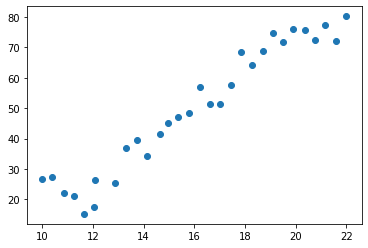

In [62]:
# 载入数据
data = np.genfromtxt("./dataset/Incoming.csv", delimiter=",")
x_data = data[1:, 1]
y_data = data[1:, 2]
plt.scatter(x_data, y_data)
plt.show()

![image.png](./dataset/001.png)
![image.png](./dataset/002.png)

In [63]:
# 学习率 learning rate
lr = 0.0003
# 截距
b = 0
# 斜率
k = 0
# 最大迭代次数
epochs = 60

# 最小二乘法 （代价函数）
def compute_cost(b, k, x_data, y_data):
    total = 0
    for i in range(len(x_data)):
        total += (y_data[i] - (k * x_data[i] +b)) ** 2
    return total / float(len(x_data))

def gradient_descent_runner(x_data, y_data, b, k, lr, epochs):
    size = float(len(x_data))
    for i in range(epochs):
        b_grad = 0
        k_grad = 0
        # 计算梯度的总和再求平均 (代价函数求导)
        for j in range(0, len(x_data)):
            b_grad += (1/size) * ((k * x_data[j] + b) - y_data[j])
            k_grad += (1/size) * x_data[j] * ((k * x_data[j] + b) - y_data[j])
        # 更新 b 和 k
        b = b - (lr * b_grad)
        k = k - (lr * k_grad)
        
        # 每迭代5次，输出一次图像
        if i % 5 == 0:
            plt.plot(x_data, y_data, 'b.')
            plt.plot(x_data, k * x_data + b, 'r')
            plt.show()
        
    return b, k


start b = 0, k = 0, cost = 2909.460990047985
Running...


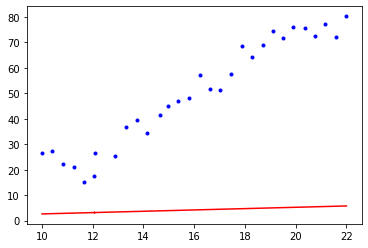

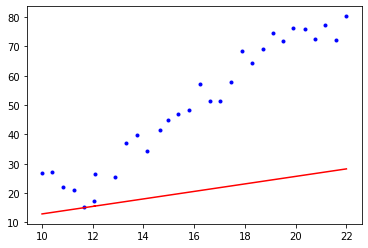

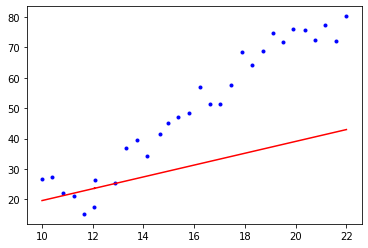

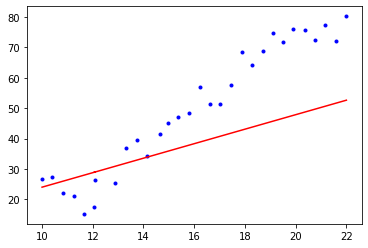

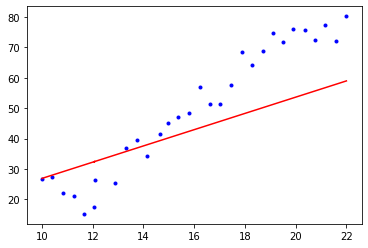

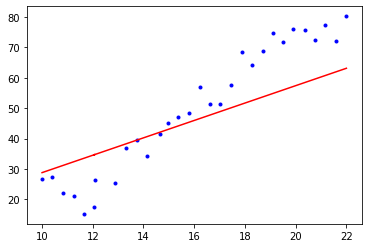

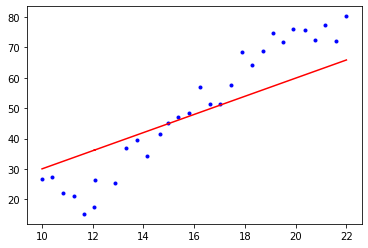

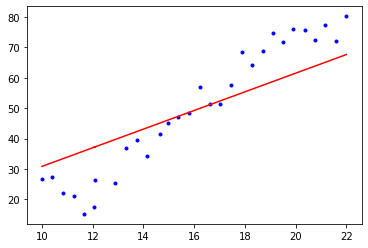

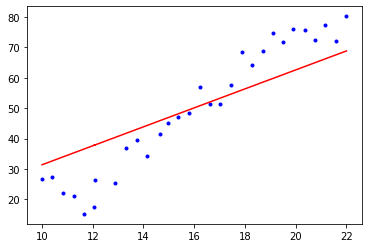

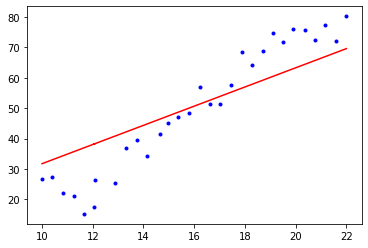

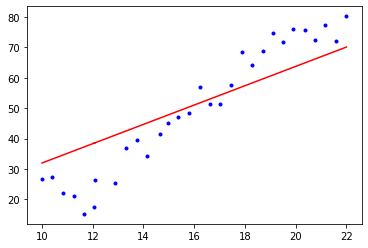

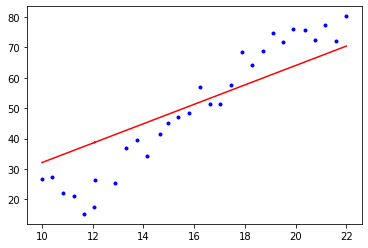

After 60, iterations b = 0.15664387481340747, k = 3.2032048610375967, cost = 102.0268895077523


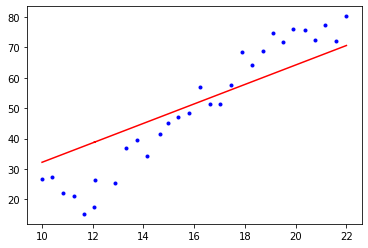

In [64]:
print("start b = {0}, k = {1}, cost = {2}".format(b, k, compute_cost(b, k, x_data, y_data)))
print("Running...")
b, k = gradient_descent_runner(x_data, y_data, b, k, lr, epochs)
print("After {0}, iterations b = {1}, k = {2}, cost = {3}".format(epochs, b, k, compute_cost(b, k, x_data, y_data)))

# 画图
plt.plot(x_data, y_data, 'b.')
plt.plot(x_data, k * x_data + b, 'r')
plt.show()